In [1006]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [1007]:
idahoCounties = ['Ada', 'Adams', 'Bannock', 'Benewah', 'Bingham', 'Blaine', 'Boise', 'Bonner', 'Bonneville', 'Boundary','Butte', 
 'Camas', 'Canyon', 'Caribou', 'Cassia', 'Clark', 'Clearwater', 'Custer', 'Elmore', 'Franklin', 'Fremont', 'Gem', 'Gooding', 
 'Idaho', 'Jefferson', 'Jerome' 'Kootenai', 'Latah', 'Lemhi', 'Lewis', 'Lincoln', 'Madison', 'Minidoka','Nez Perce', 
 'Oneida', 'Owyhee', 'Payette', 'Power', 'Shoshone', 'Teton', 'Twin Falls', 'Valley', 'Washington']
        

notIdahoCounties = ['Baker', 'Beaverhead', 'Box Elder', 'Elko', 'Gallatin', 'Malheur', 'Mineral', 'Missoula', 'Ravalli', 'Sanders']

# IMPORT DATA

In [1008]:
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [1009]:
# CONVERT DATE TO DATETIME FORMAT
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])

# CREATE COLUMNS WE NEED
idaho_Fire_Weather_Drought_df['FIRE_DAYS'] = (((idaho_Fire_Weather_Drought_df['CONT_DOY']) + 1) - idaho_Fire_Weather_Drought_df['DISCOVERY_DOY'])
idaho_Fire_Weather_Drought_df['COUNTY_NAME'] = (idaho_Fire_Weather_Drought_df['FIPS_NAME'])
# Create month column
idaho_Fire_Weather_Drought_df['DISCOVERY_MONTH_CONVERTED']=idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'].apply(lambda x: int(x.strftime('%m')))

# FILTER ROWS FOR FIRES IN COUNTIES OUTSIDE IDAHO
idaho_Fire_Weather_Drought_df = idaho_Fire_Weather_Drought_df[idaho_Fire_Weather_Drought_df['NAME'].isin(idahoCounties)]

# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4,FIRE_DAYS,COUNTY_NAME,DISCOVERY_MONTH_CONVERTED
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,77.00,69.08,69.98,71.06,1,Fremont,7
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,64.04,62.06,69.08,66.92,1,Bannock,7
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.8,64.94,68.00,71.96,71.96,1,Bannock,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,15481,1847545,Point,1,1847545,300274025,SFO-2015IDIDL6102015028,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,64.58,60.80,59.90,60.62,2,Boise,10
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,0.0,0.9,0.0,58.28,60.08,66.74,59.36,2,Boundary,10
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,0.9,0.0,0.0,60.08,66.74,59.36,50.00,1,Boundary,10
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,67.28,58.46,61.52,63.68,1,Valley,10


## DATA CLEAN UP AND REMOVE UNWANTED COLUMNS

In [1011]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

In [1012]:
# Get dummy variables for nominal property column
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["STAT_CAUSE_DESCR"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # replace values in each column according to the dictionaries above
# idaho_Fire_Weather_Drought_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

### Generate and associate cities using the lat lng coordinates

# MODELING

In [1013]:
idaho_Fire_Weather_Drought_df['D3']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
15481      0.00
15483    100.00
15484    100.00
15485      1.75
15486    100.00
Name: D3, Length: 14764, dtype: float64

In [1014]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

In [1015]:
Corr_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 
                                         'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 
                                         'DAY_AVG_TEMP_4']]

# Corr_df = idaho_Fire_Weather_Drought_df[['NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
    
Corr_df['FIRE_SIZE_CLASS']= Corr_df['FIRE_SIZE_CLASS'].astype('category').cat.codes

Corr_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FIRE_SIZE_CLASS,DISCOVERY_MONTH_CONVERTED,FIRE_YEAR,AVE_SIZE12,CROP_ACR12,None,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
FIRE_SIZE_CLASS,1.000000,-0.041355,-0.029787,0.164103,0.153929,-0.061657,0.061657,0.086526,0.032926,0.004249,-0.002242,-0.028620,-0.055344,-0.075880,-0.080845,0.013903,0.011119,0.045690,0.080934
DISCOVERY_MONTH_CONVERTED,-0.041355,1.000000,-0.055424,0.029503,0.005094,-0.114688,0.114688,0.094410,0.141508,0.155857,0.048277,-0.031942,0.009039,0.027745,0.009155,-0.015691,-0.039608,-0.067106,-0.119971
FIRE_YEAR,-0.029787,-0.055424,1.000000,-0.140140,-0.189653,0.121789,-0.121789,-0.166335,-0.207484,-0.176021,-0.115904,0.036921,0.047279,0.027605,0.037339,0.116305,0.111799,0.104563,0.107750
AVE_SIZE12,0.164103,0.029503,-0.140140,1.000000,0.577038,-0.133412,0.133412,0.142253,0.098938,0.095097,0.045976,-0.005791,-0.019769,-0.006955,-0.014968,0.021619,0.030350,0.047199,0.045876
CROP_ACR12,0.153929,0.005094,-0.189653,0.577038,1.000000,-0.132350,0.132350,0.140467,0.109674,0.137247,0.104067,-0.003627,-0.025228,-0.031451,-0.012431,-0.053585,-0.059795,-0.047293,-0.024093
None,-0.061657,-0.114688,0.121789,-0.133412,-0.132350,1.000000,-1.000000,-0.723091,-0.472339,-0.247170,-0.088550,0.008819,-0.010204,-0.008531,0.007385,0.022168,0.034825,0.030902,0.030367
D0,0.061657,0.114688,-0.121789,0.133412,0.132350,-1.000000,1.000000,0.723091,0.472339,0.247170,0.088550,-0.008819,0.010204,0.008531,-0.007385,-0.022168,-0.034825,-0.030902,-0.030367
D1,0.086526,0.094410,-0.166335,0.142253,0.140467,-0.723091,0.723091,1.000000,0.706057,0.371529,0.133451,0.005973,0.009641,-0.005439,-0.032578,-0.018528,-0.029408,-0.021781,-0.010290
D2,0.032926,0.141508,-0.207484,0.098938,0.109674,-0.472339,0.472339,0.706057,1.000000,0.585133,0.214772,0.023205,0.013006,0.010419,-0.022084,-0.074088,-0.086901,-0.089825,-0.086585
D3,0.004249,0.155857,-0.176021,0.095097,0.137247,-0.247170,0.247170,0.371529,0.585133,1.000000,0.439357,-0.006495,-0.011759,-0.019995,-0.017357,-0.114529,-0.119997,-0.126880,-0.114875


## CREATING A NEURAL NETWORK MODELING

In [1016]:
# # INVESTIGATING INPUTS
# # Possible X columns
# # [['DISCOVERY_MONTH_CONVERTED', 'FIRE_SIZE_CLASS', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 
# #   'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# New_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
# New_df['FIRE_SIZE_CLASS']= New_df['FIRE_SIZE_CLASS'].astype('category').cat.codes
# # New_df['AVE_FAM_SZ']= New_df['AVE_FAM_SZ'].apply(lambda x: x//1)

# # Drop Y column
# New_df = New_df.drop(['FIRE_SIZE_CLASS'], axis=1)
# New_df = New_df.drop(['STAT_CAUSE_DESCR'], axis=1)

# # Run PCA 
# from sklearn.decomposition import PCA
# n_components=40
# pca = PCA(n_components=n_components)

# # Create multiple columns for County "NAME"
# New_df = pd.get_dummies(New_df, columns=['NAME'])
# # New_df = pd.get_dummies(New_df, columns=['STAT_CAUSE_DESCR'])

# NoOfCols = n_components

# X_Array = New_df.to_numpy()
# pca.fit(X_Array)
# # print(pca.singular_values_)
# x = pca.transform(X_Array)
# x
# # print(x.shape)
# # type(x)
# # x

# NoOfCols = n_components
# NoOfRuns = 2000

In [1017]:
# CREATE X VALUES
# X by Keep
X = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'DISCOVERY_MONTH_CONVERTED','DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 
                                   'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 
                                   'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# Either Or
X = X.drop(['FIRE_SIZE_CLASS','DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None'], axis=1)
# X = pd.get_dummies(X, columns=['FIRE_SIZE_CLASS'])
X = pd.get_dummies(X, columns=['NAME'])

# seed values for reshape and no of ML runs (epochs)
NoOfCols = 55
NoOfRuns = 1000

# Reshape X from df to array v1
X = X.values.reshape(-1, NoOfCols)

# Reshape X from df to array v2
# X = X.to_numpy()

# View output
print(f"Shape of X Input is {X.shape}")
print(f"Type of X input is {type(X)}")
X

(14764, 55)


,DISCOVERY_MONTH_CONVERTED,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,...,NAME_Nez Perce,NAME_Oneida,NAME_Owyhee,NAME_Payette,NAME_Power,NAME_Shoshone,NAME_Teton,NAME_Twin Falls,NAME_Valley,NAME_Washington
0,7,100.0,100.00,100.00,0.00,0.0,0.5,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,100.0,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7,100.0,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,7,100.0,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7,100.0,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,10,100.0,68.11,4.16,0.00,0.0,0.8,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
15483,10,100.0,100.00,100.00,100.00,0.0,0.2,0.0,0.9,0.0,...,0,0,0,0,0,0,0,0,0,0
15484,10,100.0,100.00,100.00,100.00,0.0,0.0,0.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
15485,10,100.0,100.00,100.00,1.75,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [1]:
# CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR']]

# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]
# y = pd.get_dummies(y, columns=["STAT_CAUSE_DESCR"])

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

# View output
print(f"Shape of y is {y.shape}")
print(f"Type of y is {type(y)}")
y

NameError: name 'idaho_Fire_Weather_Drought_df' is not defined

## TEST AND TRIAN SPLITS

In [1019]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1020]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled.shape)

(11073, 55)


In [1021]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network models to test

In [1022]:
# X Inputs
X_train.shape

(11073, 55)

In [1023]:
# X Inputs
print(X_train.shape)
print(X_train_scaled.shape)

# Y Inputs
print(y_train_categorical.shape)

(11073, 55)
(11073, 55)
(11073, 13)


In [1024]:
# Normal neural network with X inputs, 1 hidden layer, 10 nodes in hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense, Dropout

fire_cause_model_v1 = Sequential()
fire_cause_model_v1.add(Dense(units=20, activation='sigmoid', input_dim=NoOfCols))
fire_cause_model_v1.add(Dense(128, activation='relu'))
fire_cause_model_v1.add(Dropout(.1))
fire_cause_model_v1.add(Dense(128, activation='relu'))
fire_cause_model_v1.add(Dense(units=13, activation='softmax'))

# view the model's architecture
fire_cause_model_v1.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_330 (Dense)            (None, 20)                1120      
_________________________________________________________________
dense_331 (Dense)            (None, 128)               2688      
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_332 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_333 (Dense)            (None, 13)                1677      
Total params: 21,997
Trainable params: 21,997
Non-trainable params: 0
_________________________________________________________________


In [1025]:
## Compile and train the deep learning model
fire_cause_model_v1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v1 = fire_cause_model_v1.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=NoOfRuns,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
347/347 - 1s - loss: 1.2228 - accuracy: 0.6593
Epoch 2/1000
347/347 - 0s - loss: 1.0881 - accuracy: 0.6850
Epoch 3/1000
347/347 - 0s - loss: 1.0614 - accuracy: 0.6894
Epoch 4/1000
347/347 - 0s - loss: 1.0450 - accuracy: 0.6946
Epoch 5/1000
347/347 - 0s - loss: 1.0343 - accuracy: 0.6976
Epoch 6/1000
347/347 - 0s - loss: 1.0230 - accuracy: 0.7024
Epoch 7/1000
347/347 - 0s - loss: 1.0177 - accuracy: 0.7055
Epoch 8/1000
347/347 - 0s - loss: 1.0094 - accuracy: 0.7033
Epoch 9/1000
347/347 - 0s - loss: 1.0014 - accuracy: 0.7075
Epoch 10/1000
347/347 - 0s - loss: 0.9995 - accuracy: 0.7057
Epoch 11/1000
347/347 - 0s - loss: 0.9897 - accuracy: 0.7092
Epoch 12/1000
347/347 - 0s - loss: 0.9892 - accuracy: 0.7079
Epoch 13/1000
347/347 - 0s - loss: 0.9799 - accuracy: 0.7088
Epoch 14/1000
347/347 - 0s - loss: 0.9737 - accuracy: 0.7090
Epoch 15/1000
347/347 - 0s - loss: 0.9686 - accuracy: 0.7095
Epoch 16/1000
347/347 - 0s - loss: 0.9698 - accuracy: 0.7123
Epoch 17/1000
347/347 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

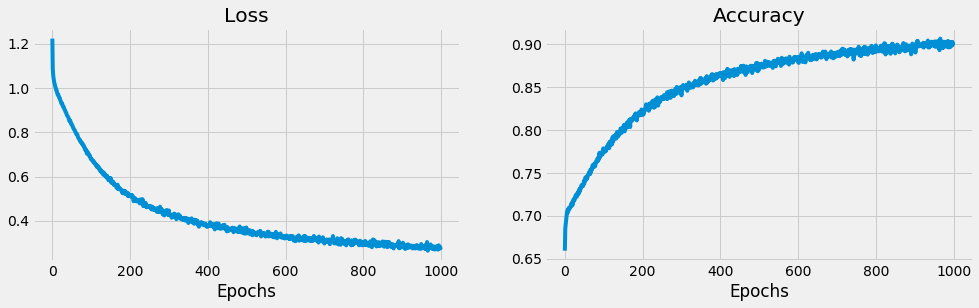

In [1026]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v1.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v1.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

## Quantifying the Model

In [1027]:
model_loss, model_accuracy = fire_cause_model_v1.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

116/116 - 0s - loss: 5.8454 - accuracy: 0.3365
Loss: 5.845366954803467, Accuracy: 0.33649417757987976


In [1028]:
### Making Predictions with new data
# new_data = X_scaler.transform(np.array([[-1.2, 0.3, 0.4]]))
new_data = X_test

print(f"Model output: {fire_cause_model_v1.predict(new_data)}")
print(f"Predicted class: {np.argmax(fire_cause_model_v1.predict(new_data))}")

Model output: [[2.3432041e-03 1.4971891e-04 1.0347665e-12 ... 6.7058981e-10
  2.9456588e-03 2.9979016e-29]
 [6.2511255e-08 9.4352531e-01 4.4196542e-22 ... 2.2387091e-25
  6.6291708e-11 1.2163030e-38]
 [6.2476929e-08 9.4353431e-01 4.4222770e-22 ... 2.2366475e-25
  6.6283111e-11 1.2156372e-38]
 ...
 [5.9986434e-08 9.4561613e-01 4.7315549e-22 ... 2.1029383e-25
  6.6626676e-11 0.0000000e+00]
 [1.8128914e-09 3.7389804e-04 1.7642555e-15 ... 1.0265123e-24
  3.6233163e-09 4.1862732e-38]
 [1.9691754e-08 5.8017304e-04 2.2177362e-11 ... 9.9587043e-05
  1.0474913e-03 3.3024739e-24]]
Predicted class: 10913


In [1029]:
### View prediction probabilities
predictions_v1 = np.argmax(fire_cause_model_v1.predict(X_test), axis=1)
probs_v1 = fire_cause_model_v1.predict(X_test)

# Change the shape of y
old_y_test = y_test
new_y_test = np.array(old_y_test)
y_test = new_y_test.reshape(-1, 1) 
y_test
y_test_df = y_test.ravel()
y_test_df


pred_df = pd.DataFrame({
    "Predictions_v1": predictions_v1,
    "Actual": y_test_df, 
    "P(0) model1": np.round(probs_v1[:, 0], 5),
    "P(100) model1": np.round(probs_v1[:, 1], 5),
    })

pred_df.head(50)

,Predictions_v1,Actual,P(0) model1,P(100) model1
0,6,7,0.00234,0.00015
1,1,6,0.00000,0.94353
2,1,6,0.00000,0.94353
3,1,6,0.00000,0.94353
4,1,4,0.00000,0.90320
5,6,6,0.00000,0.00025
6,5,6,0.00000,0.00058
7,6,6,0.00000,0.00160
8,6,6,0.00000,0.00025
9,6,4,0.00000,0.00348


### Saving the model

In [1030]:
# SAVING MODEL
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import pickle

with open('NN_fireCauseModel.pkl','wb') as f:
    pickle.dump(fire_cause_model_v1, f)


import joblib
filename = 'NN_fireCauseModel.sav'
joblib.dump(fire_cause_model_v1, filename)


TypeError: can't pickle weakref objects